# **Sprint 3 Mini Project**


## Sprint 학습 목표

- 선형대수의 기본 개념(scalar, vector, matrix)과 그 필요성을 이해할 수 있다.
- 머신러닝의 지도학습과 비지도학습의 차이점을 이해할 수 있다.
  - 비지도학습의 종류인 차원축소와 클러스터링을 목적에 맞게 진행할 수 있다.

## Project 문제 정의

### 배경

> 여러분은 국제 NGO 기구에서 데이터 분석 업무를 담당하고 있습니다. 현재 해당 NGO에서는 확보한 자금을 효과적으로 사용하기 위해 논의 중입니다. 진행 중인 의사결정 중 가장 중요한 것은 **가장 도움이 필요한 국가**를 선정하는 것입니다. 따라서 여러분은 주어진 데이터의 국가들의 기본 건강 정보 및 사회적 경제적 정보를 바탕으로 국가 내의 발전 정도를 파악하여, 어느 국가에 가장 먼저 도움을 줄 것인지에 대한 인사이트를 도출하는 업무를 맡게 되었습니다.

### Project 목표

- 국가별로 전반적인 소득, 생활, 경제 상황을 확인하고 군집화를 수행한다.
- 어떤 국가에 우선적으로 집중하여 자금을 줄 것인지에 대한 인사이트를 도출한다. 

## **N131 - Linear Algebra**

### 오늘의 목표
- Vector, Matrix 연산을 통해 필요한 정보를 도출할 수 있다.
- 선형 독립과 선형 종속의 의미를 이해할 수 있다.


### `Topic 1`: 데이터셋 전처리
> 본격적으로 Project를 진행하기 위해 데이터셋을 불러와 전처리를 진행해봅시다.

<br>

🚨 **data description**

- `country`: 국가명

- `child_mort`: 5세 미만 영유아 사망률 (1000명 당)

- `exports`: 전체 GDP 대비 수출 비율 (상품 및 서비스)

- `health`: 전체 GDP 대비 의료 관련 총 소비율

- `imports`: 전체 GDP 대비 수입 비율 (상품 및 서비스)

- `Income`: 1인당 순 이익

- `Inflation`: 인플레이션율

- `life_expec`: 기대수명

- `total_fer`: 합계출산율

- `gdpp`: 1인당 GDP




#### **1-1. pandas의 `read_csv` 함수를 활용하여 주어진 csv 파일을 `aid`라는 이름으로 불러오세요.**

In [47]:
import numpy as np
import pandas as pd
import time

aid = pd.read_csv("csv/country.csv")
aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### **1-2. `aid`에 대해 품질의 문제와 구조적 문제가 있는지 확인 후 있다면 해결하세요.**

In [48]:
aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [49]:
aid.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [50]:
aid.duplicated().sum()

0

In [51]:
for i in aid.columns:
    if aid[i].dtype == "object":
        pass
    else:
        print(i +" = "+ str(aid[str(i)].mean().round(2)))

child_mort = 38.27
exports = 41.11
health = 6.82
imports = 46.89
income = 17144.69
inflation = 7.78
life_expec = 70.56
total_fer = 2.95
gdpp = 12964.16


### `Topic 2`: Vector & Matrix 연산
> 위에서 전처리를 마친 `aid`를 활용하여 연산을 진행해봅시다.



#### **2-1. 좌표 평면 상에서 3 국가 간의 거리를 측정하여 어떤 국가 간의 거리가 가장 짧은지 구해보세요.**
- `aid` 내 index가 2,4,6인 국가를 추출하세요.
- 해당 국가들의 데이터를 가지고 exports와 imports를 각각 x축, y축으로 하는 scatterplot을 그려보세요.
- 국가들 간의 거리를 Vector의 길이 공식을 활용하여 계산해보세요.
  - $||v|| = \sqrt{a^2 + b^2 + c^2 + \cdots}$

In [52]:
distance_aid = aid.loc[[2,4,6]]
distance_aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


<AxesSubplot: xlabel='exports', ylabel='imports'>

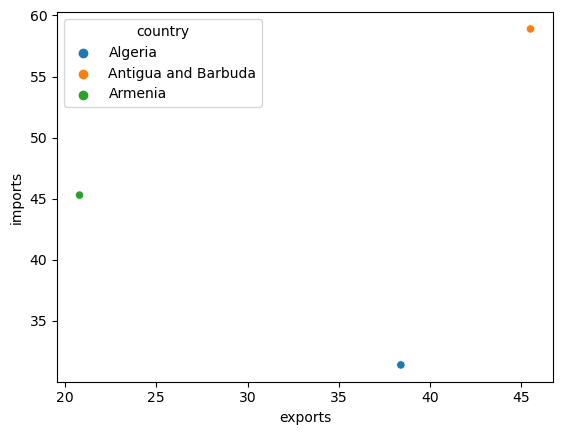

In [53]:
import seaborn as sns
sns.scatterplot(x="exports", y="imports", data=distance_aid, hue="country")

In [54]:
# `exports`: 전체 GDP 대비 수출 비율 (상품 및 서비스)
# `imports`: 전체 GDP 대비 수입 비율 (상품 및 서비스)
"""
Algeria : 전체 GDP 대비 수출 비중이 수입보다 크다.
Antigua and Barbuda : 전체 GDP 대비 수출과 수입 비중이 비슷하며 둘다 크다.
Armenia : 전체 GDP 대비 수입 비중이 수출보다 크다.
"""

'\nAlgeria : 전체 GDP 대비 수출 비중이 수입보다 크다.\nAntigua and Barbuda : 전체 GDP 대비 수출과 수입 비중이 비슷하며 둘다 크다.\nArmenia : 전체 GDP 대비 수입 비중이 수출보다 크다.\n'

#### **2-2. 행렬곱을 사용하여 10개 국의 총 임금의 합을 계산해보세요.**
- `aid` 내 index가 0~9인 국가를 추출하세요.
- 해당 국가들의 국민 수는 각각 [10, 20, 30, 20, 10, 50, 30, 20, 10, 40] 이라고 가정한 후, `income`과 국민 수를 활용하여 10개 국 전체의 임금 합을 계산하세요.
- for loop을 사용하여 해당 수식을 구현했을 때와 비교했을 때 어떤 것이 더 효율적인지 확인해보셔도 좋습니다.

In [55]:
Ind09_aid = aid[0:10]
population = [10, 20, 30, 20, 10, 50, 30, 20, 10, 40]
Ind09_aid

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [56]:
Ind09_aid["population"] = population
Ind09_aid

/var/folders/6z/x623xjv92hs04k54cpt4qhfw0000gn/T/ipykernel_97162/501376147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ind09_aid["population"] = population


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,population
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,10
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,20
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,30
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,20
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,10
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,50
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,30
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,20
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,10
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,40


In [57]:
start_time = time.time()
sum = 0
for i in range(0,10):
    sum += Ind09_aid["income"][i] * Ind09_aid["population"][i]
print(sum)
end_time = time.time()
elapsed = end_time - start_time

print(elapsed)

3946700
0.00021791458129882812


In [59]:
start_time = time.time()
Ind09_aid["inpop"] = Ind09_aid.apply(lambda x: x["income"] * x["population"], axis=1)
print(Ind09_aid["inpop"].sum())
end_time = time.time()
elapsed = end_time - start_time

print(elapsed)

3946700
0.001194000244140625


/var/folders/6z/x623xjv92hs04k54cpt4qhfw0000gn/T/ipykernel_97162/2887326232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ind09_aid["inpop"] = Ind09_aid.apply(lambda x: x["income"] * x["population"], axis=1)


In [60]:
start_time = time.time()
print(sum(Ind09_aid["income"] * Ind09_aid["population"]))
end_time = time.time()
elapsed = end_time - start_time

print(elapsed)

TypeError: 'numpy.int64' object is not callable

### `Topic 3`: 선형 종속, 선형 독립




#### **3-1. '두 벡터가 선형 종속 관계에 있다' 라는 말이 어떤 의미인지 설명해보세요.**
- 선형 종속과 선형 독립의 의미를 생각해보세요.
- 선형 종속인 두 벡터를 2차원 평면에 나타내면 어떻게 표현이 되는지, 시각화를 통해 이해해보셔도 좋습니다.